# Section 2a
Our first look at the data will be focused on the time variations of the accidents:
- What is the evolution of the number of accidents over the years ?
- Are there more accidents certain months of the year ? Certain days of the week ?

In [16]:
from CSVtoSQLconverter import load_sql_engine
sqlEngine = load_sql_engine()
import pandas as pd
import numpy as np
# Provides better color palettes
import seaborn as sns

from pandas import DataFrame,Series

import matplotlib as mpl
import matplotlib.pyplot as plt
# Command to display the plots in the iPython Notebook
%matplotlib inline
import matplotlib.patches as mpatches

mpl.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

## Read the dataframe
We have loaded in the SQL database the years 2010 to 2014. We can directly extract from the database the counts for each month of each year and this throughout this whole section.
We use the Characteristics table since it each accident corresponds to one entry in this table. Furthermore this table contains a column for the data and time of the accident stored in the convenient datetime format.

In [37]:
PerMonth = pd.read_sql_query('''SELECT YEAR(datetime), MONTH(datetime), DAY(LAST_DAY(datetime)), 
                            COUNT(`accident id`) FROM characteristics
                            GROUP BY YEAR(datetime), MONTH(datetime);''',
                            sqlEngine)
PerMonth.head()

,YEAR(datetime),MONTH(datetime),DAY(LAST_DAY(datetime)),COUNT(`accident id`)
0,2010,1,31,4711
1,2010,2,28,4467
2,2010,3,31,5503
3,2010,4,30,6019
4,2010,5,31,6087


In [38]:
PerMonth.rename(columns={'YEAR(datetime)':'year','MONTH(datetime)':'month',
                         'DAY(LAST_DAY(datetime))':'number days',
                         'COUNT(`accident id`)':'accident count'},inplace=True)
PerMonth.head()

,year,month,number days,accident count
0,2010,1,31,4711
1,2010,2,28,4467
2,2010,3,31,5503
3,2010,4,30,6019
4,2010,5,31,6087


## Evolution over the years

In [52]:
PerYear = PerMonth.groupby(['year'],as_index=False).sum()
PerYear

,year,month,number days,accident count
0,2010,78,365,69379
1,2011,78,365,66974
2,2012,78,366,62250
3,2013,78,365,58397
4,2014,78,365,59854


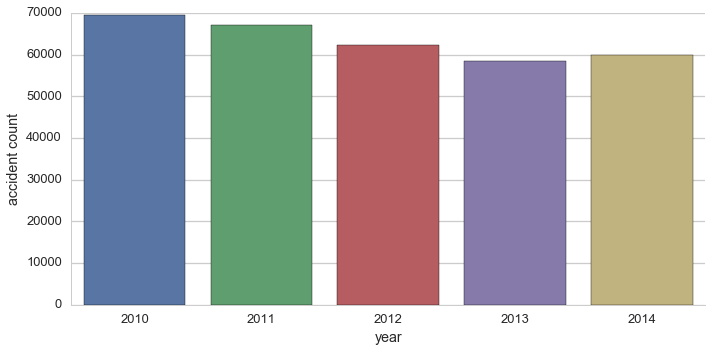

In [41]:
g = sns.factorplot(x="year",y='accident count',
                   data=PerYear, kind='bar', size=5, aspect=2.0)

It is pleasing to see that the number of accidents has been overall decreasing since 2010, although 2014 is slightly higher than 2013.

## Number of accidents for each month
Let's see if certain months have more accidents than others. We need to normalize per days this time since the difference between the longest and shortest months corresponds to ~10% of the length of a month.

In [43]:
PerMonthNorm = PerMonth.copy()
PerMonthNorm['per day'] = PerMonthNorm['accident count'] / PerMonthNorm['number days']
PerMonthNorm.head()

,year,month,number days,accident count,per day
0,2010,1,31,4711,151.967742
1,2010,2,28,4467,159.535714
2,2010,3,31,5503,177.516129
3,2010,4,30,6019,200.633333
4,2010,5,31,6087,196.354839


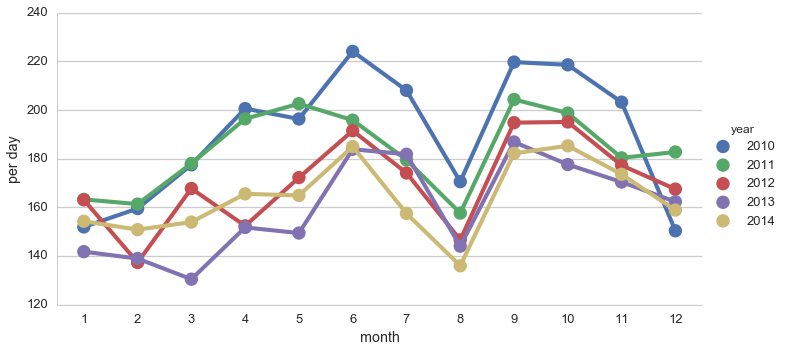

In [46]:
sns.factorplot(x='month', y='per day', hue="year", data=PerMonthNorm, size=5,aspect=2.0)

The 5 years we have follow the same trends overall. We can safely average over them.

In [53]:
PerMonthMean = PerMonth.groupby('month', as_index=False).mean()
PerMonthMean['per day'] = PerMonthMean['accident count'] / PerMonthMean['number days']
PerMonthMean

,month,year,number days,accident count,per day
0,1,2012.0,31.0,4801.8,154.896774
1,2,2012.0,28.2,4216.6,149.524823
2,3,2012.0,31.0,5008.4,161.561290
3,4,2012.0,30.0,5200.6,173.353333
4,5,2012.0,31.0,5491.0,177.129032
5,6,2012.0,30.0,5882.6,196.086667
6,7,2012.0,31.0,5587.2,180.232258
7,8,2012.0,31.0,4680.8,150.993548
8,9,2012.0,30.0,5928.4,197.613333
9,10,2012.0,31.0,6047.8,195.090323


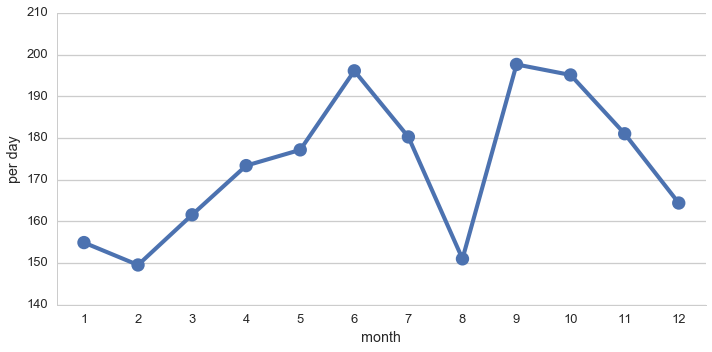

In [54]:
sns.factorplot(x='month', y='per day', data=PerMonthMean, size=5,aspect=2.0)

The dip in July and August can be attibuted to the holiday season. August is the most important month for holidays in France. So despite the long distances travelled by some to reach their vacation spot, the number of accidents decreases during the holidays.